<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


### Data Analytics of Airbnb Data:

#### Objective:

In this excercise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

You can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price, availability, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [3]:
## Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
df["country"].value_counts()

United States    102067
Name: country, dtype: int64

This information is just for the US so we can drop country and country code. We're not planning on conducting geospatial analysis so we can also drop latitude and longitude as neighbourhood will give us more general location information.

In [6]:
d_col = ["country", "country code", "host id", "id", "host name", "NAME", "host_identity_verified"]

In [7]:
df.drop(d_col, axis=1, inplace=True)
df.dtypes

neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [8]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isnull()
missing_values.sum().sort_values(ascending=True)

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
service fee                          273
calculated host listings count       319
review rate number                   326
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [48]:
# view the missing values as a proportion of the total 
proportion_missing_values = missing_values.sum() / len(df)
proportion_missing_values.sort_values(ascending=True)

room type                         0.000000
lat                               0.000083
long                              0.000083
neighbourhood                     0.000167
neighbourhood group               0.000302
cancellation_policy               0.000791
instant_bookable                  0.001093
number of reviews                 0.001906
Construction year                 0.002228
price                             0.002572
service fee                       0.002843
calculated host listings count    0.003322
review rate number                0.003395
minimum nights                    0.004259
availability 365                  0.004665
reviews per month                 0.165348
last review                       0.165493
house_rules                       0.542839
license                           1.068340
dtype: float64

License details are missing at so high a proportion as to be useless for analysis. We'll drop the column. House_rules also is missing over 50% of the values and isn't something you could accurately impute with the tools at hand (or possibly at all)

In [10]:
df.drop(["house_rules","license"], axis=1, inplace=True)

In [11]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df.duplicated().sum()

6565

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
## Display the total number of records in the dataframe after removing the duplicates.
df.shape[0]

96034

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshots of your work.

In [14]:
## Rename the column.
df.rename(columns={"availability 365": "days_booked"}, inplace=True)

In [15]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
for column in df.columns:
    new_column = column.lower().replace(" ", "_")
    df.rename(columns={column: new_column}, inplace=True)

In [16]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['service_fee'] = df['service_fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [17]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                             float64
service_fee                       float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
days_booked                       float64
dtype: object

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [18]:
## List the count of various room types avaliable with Airbnb
df["room_type"].value_counts()

Entire home/apt    50530
Private room       43307
Shared room         2082
Hotel room           115
Name: room_type, dtype: int64

In [19]:
df["cancellation_policy"].value_counts()

moderate    32157
flexible    31904
strict      31897
Name: cancellation_policy, dtype: int64

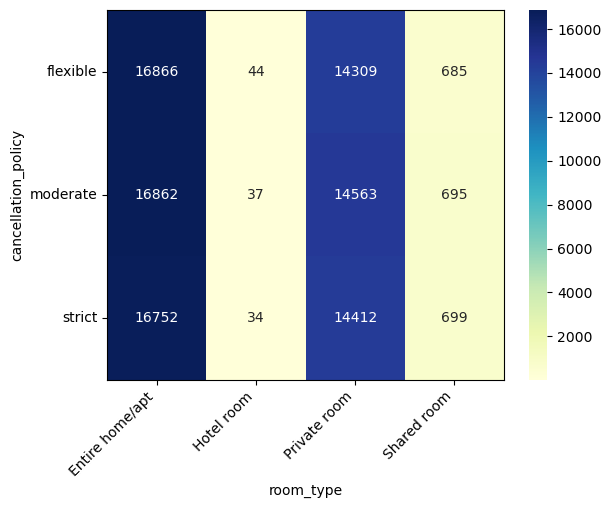

In [38]:
## Which room type adheres to more strict cancellation policy
cross_tab = pd.crosstab(df['cancellation_policy'], df['room_type'])
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Display the plot
plt.show()

None of the room types have that significant of a difference but shared rooms have more locations with strict cancellation policies, 699 against 695 and 685 locations with moderate and flexible policies respectively.

In [21]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
df_neighbourhoodg = df.groupby("neighbourhood_group")

In [39]:
df_neighbourhoodg['price'].mean()

neighbourhood_group
Bronx            628.452711
Brooklyn         626.281884
Manhattan        622.525871
Queens           629.132850
Staten Island    627.073948
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

In [40]:
df_neighbourhoodg['price'].median()

neighbourhood_group
Bronx            636.0
Brooklyn         626.0
Manhattan        621.0
Queens           626.0
Staten Island    629.0
brookln          580.0
manhatan         460.0
Name: price, dtype: float64

The most expensive neighbourhood group is the Bronx, we double checked with the median so as not to be misled by outliers

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [52]:
df_neighbourhood = df.groupby("neighbourhood")
df_neighbourhood['price']

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=df)

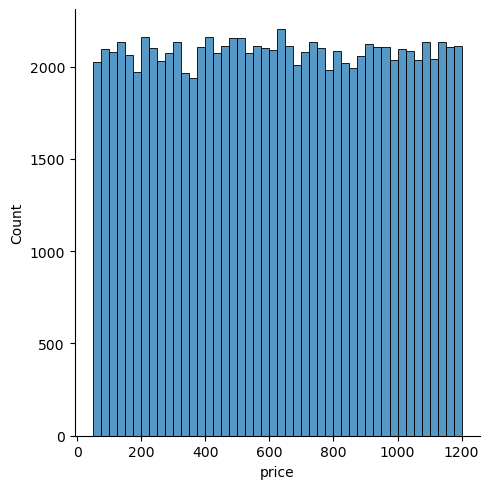

In [50]:
sns.displot(df.price)

In [ ]:
sns.boxplot(, data=df)

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationship between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.